## Embedding in $d=2$, cycling network

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from neurodyn import *
from utils import *

In [3]:
F, G = make_F_G_valentin(p=2, N=20_000, phi=sigmoid)
phi=sigmoid
I_ext=lambda t: 0

In [7]:
rnn_original = LowRankRNN(F, G, phi, I_ext)
rnn_delta0_shift0 = LowRankCyclingRNN(F, G, phi, I_ext, delta=0, shift=0)
rnn_delta0_shift1 = LowRankCyclingRNN(F, G, phi, I_ext, delta=0, shift=1)
rnn_delta20_shift1 = LowRankCyclingRNN(F, G, phi, I_ext, delta=20, shift=1)

In [12]:
rnn = LowRankCyclingRNN(F, G, phi, I_ext, delta=20, shift=1)
# res = rnn.simulate_h(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
res = rnn.simulate_h(np.concatenate([rnn.F[:rnn.N//2, 0], rnn.F[rnn.N//2:, 1]]), (0, 40), dt_max=1, progress=True)

simulation time: 100.00%|██████████| t=40.000 of 40 [00:05<00:00]


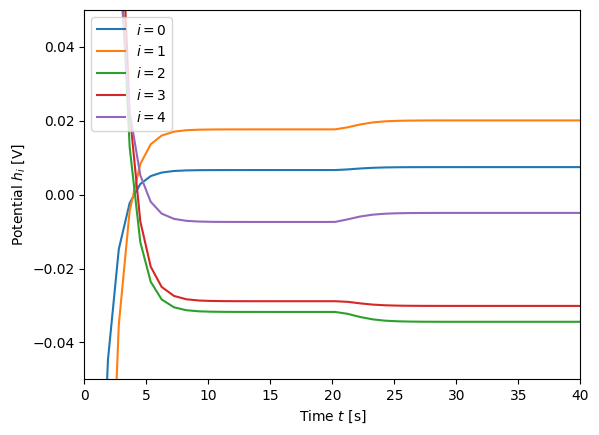

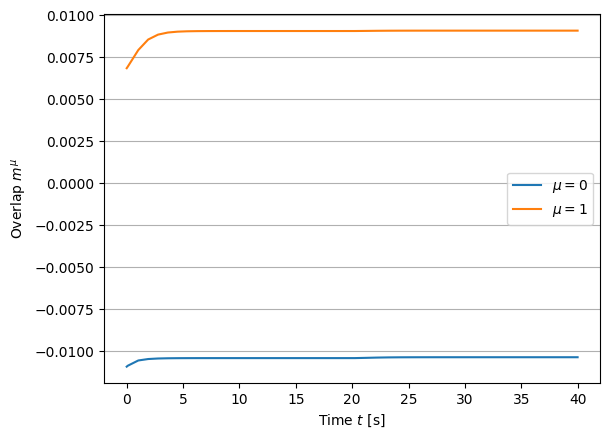

In [15]:
fig, ax = plot_neuron_trajectory(res)
ax.set_xlim((0, 40))
ax.set_ylim((-0.05, 0.05))
plot_overlap_trajectory(rnn, res);